# **Sklearn Project: Pneumonia Detector Using CNNs**

# Introduction

Over the summer, I got pneumonia, which is an infection in the lungs, where your airsacs fill up with fluid or pus, because of a virus or bateria. My pneumonia was mild, but it was terrible because I was always fatigued, coughing up phlem, I lost my appetite, and I had a hard time breathing.

Pneumonia is scary and unfortunately can lead to fatality in younger children and the elderly. When I was sick, I researched about pneumonia and learned how pneumonia was detected. Turns out, they were detected through X-Rays and machine learning. I was fascinated and I knew I had to try to make a machine learning model that predicts pneumonia. Not only did I want to do this for the fun of it, but I was more motivated by the fact that this machine learning model can save lives from pneumonia, by helping doctors diagnose patients quicker and take action quickly. Like I said, pneumonia is scary. It's not a joke. It's a serious issue that needs to be addressed so more people can get better quickly and survive.

So here, I took the opportunity to try to make a pneumonia detector! In this project I achieved my goal of building a pneumonia detector that identifies pneumonia based on chest X-rays. The data set I used is from Kaggle and contains 5864 X-ray images of young children (ages one to five), split into three folders: training, validation and testing (train, val, test). Each set is further divided into two categories ‘NORMAL’ (no pneumonia) and ‘PNEUMONIA’ (pneumonia detected). These X-rays were sourced from Guangzhou Women and Children's Medical Center in China, and experts ensured the images were high quality and accurately labeled. 

The biggest challenges I faced included loading the split dataset (since I wasn't familiar with methods outside of Keras) augmenting the data, building a convolutional neural network, avoiding overfitting, and achieving the highest possible test accuracy. Essentially every aspect of the project was a learning curve for me. 

I spent countless hours experimenting with different data augmentation techniques, designing CNN architectures, and training the model. It was challenging but rewarding. Ultimately, I achieved 93.42% accuracy on the test set, but there were still discrepancies in the model. 

Now, let's dive into the steps I took to create this pneumonia detector:

1. **Importing Packages**

2. **Data Augumentation**

3. **CNN Architecture**

4. **Model Training**

5. **Plotting the Loss and Accuracy**

6. **Model Evaluation**

7. **Reflection**

With that, let's get right into building our pneumonia detector, starting with importing the packages required to accomplish this project.

### Step 1: Importing Packages

The packages,module,and class that I needed for this project were:

**TensorFlow**: to create and train the CNN

**Matplotlib**: to visualize the accuracy and loss of the training and validation set

**os**: to read files from the computer (this is a module)

**ImageDataGenerator**: this class is a special from Keras so you can augument image data. With this class you can make random transformations and normalize image data during training. You can also make generators to get the data from a specific directory on your computer and generate those random transformations and normalization on the images.

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Step 2: Data Augumentation

For Step 2, I augumented the data. Like I mentioned, with data augumentation, you apply random transformations to the images like rotations, shearing, and zooming, just to name a few. Augumentation is important so our model can look at various examples of the images and never see the same image more than once. By this, augumentation prevents overfitting and helps the model generalize better. 

In this case, I augumented the images by randomly generating rotation, shift in width, the shift in height, the shear range (the angle of the slant in degrees), and the zoom range. I also flip the images horizontally randomly. Honestly, the only reason why I chose these values for these parameters was because I was testing the generator from the The Keras Blog: Building Powerful Image Classification Models Using Very Little Data - I only adjusted the rotation_range because I was curious, and I took out the fill_mode because I didn't think I need it. As bad as that sounds, that's the truth. But in the end, like I mentioned, I got pretty high accuracy. Using the generator example from the website was successful and I was suprised. I had no idea what I was doing in the moment, but it worked out. With machine learning, you need to play around and try whatever you can. 

To add, I rescaled the values of the images in the train-validation-test sets, which were [0,255] to [0,1]. The images have RGB coefficients ranging from 0 to 255, but it's not practical to use these values because they be too high for the model to process (Keras Blog). To also paraphrase Chat GPT, by normalizing the values, it helps the computations run faster, reduce overflow in matrix multiplication, and we make pixel ranges more consistent. This is especially practical for X-ray images, since pneumonia detected x-rays and normal x-rays have subtle feature differences. So, with normalization, it makes it easier for the model to focus on important instead of looking at raw data with a lot features, with a large scale.

For validation set and the test set, I chose to keep it they were and only rescale them. The whole point of validation is for the model to evaluate the model from the training data, by applying it to unaltered data. The same goes for the test data, where it validates how accurate the model is on more unaltered data, which is from the test set.

For loading in the data, I had Chat GPT generate me the code to do this, since I wasn't familiar with how to load in data off other sites than Keras. 

For the training, validation and test generators, I resized the images to 150 * 150. When looking for the the dimensions to resize the images for pneumonia, I looked at a few pneumonia detectors where they used (224 * 224) , (256 * 256) , and I found one on GitHub, where they used (100 * 150). I tried using (256 * 256) previously, but I don't remember exactly why I  chose 150 * 150. I think I chose this size because I spent a lot of hours training the data, and bigger images took longer to process. So, I made the decision to go a lot smaller than originally. The original images are pretty large, they were somewhere in the 1000 range. However, though 150 * 150 was a lot smaller, it worked. 

About the color mode, I set it to 'grayscale' just because the images are grayscaled images. It's simple as that.

For batch size, I also saw a few example of pneumonia generators to make my batch size. The models for Kaggle's Pnuemonia Detection using CNN (92.6% Accuracy) and Geeks For Geeks Pneumonia Detections Using CNN in Python, both use 32 as the batch size. I looked up on Google why 32 was a good batch size for pneumonia detectors and according to Gemini AI, " A batch size of 32 is commonly used for training deep learning models to detect pneumonia from chest X-ray images, considered a good default choice as it balances computational efficiency with model accuracy across various research studies; most researchers utilize a batch size of 32 when working with pneumonia detection tasks due to its reliable performance". So, based on what Gemini AI said about the batch size, I trusted it and also used 32 like other pneumonia detectors.

Finally, about the class_mode, I set it to binary, because this is a binary classifcation problem. We have only two classifcations for the images which are normal (no pneumonia) or pneumonia. Because this has just two categories, this is a binary classification problem.

In [6]:
# define the data augumentation for the training data
train_datagen = ImageDataGenerator(
    rotation_range=20, # randomly rotate images by up to 20 degrees
    width_shift_range=0.2, # randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2, # randomly shift images vertically by up to 20% of the height
    rescale=1/255, # rescale values from[0,255] to [0,1]
    shear_range=0.2, # randomly apply shearing transformations
    zoom_range=0.2, # randomly zoom in on our images
    horizontal_flip=True # randomly flip images horizontally
)

# validation and test not augumented, just rescaled
val_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

base = '/Users/axellejimenez/Desktop/chest_xray' # looks for the chest_xray folder
train_dir = os.path.join(base, 'train') # training set directory 
val_dir = os.path.join(base, 'val') # validation set directory
test_dir = os.path.join(base, 'test') # test set directory

# flow_from_directory() reads in images from a directory and applies random transformations
train_generator = train_datagen.flow_from_directory(
    train_dir, # the path where the folder exists with the train images
    target_size=(150, 150), # resize images to 150 x 150
    color_mode='grayscale', # convert images to grayscale 
    batch_size=32, # number of images to process in a batch
    class_mode='binary' # binary classifcation
)

valid_generator = val_datagen.flow_from_directory(
    val_dir, # the path where the folder exists with the validation images
    target_size=(150, 150), # resize images to 150 x 150
    color_mode='grayscale', # convert images to grayscale 
    batch_size=32, # number of images to process in a batch
    class_mode='binary' # binary classifcation
)

test_generator = test_datagen.flow_from_directory(
    test_dir, # the path where the folder exists with the test images
    target_size=(150, 150), # resize images to 150 x 150
    color_mode='grayscale', # convert images to grayscale 
    batch_size=32, # number of images to process in a batch
    class_mode='binary', # binary classifcation
    shuffle=False # don't shuffle test data
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Step 3: CNN Architecture

In Step 3, I built the Convolutional Neural Network. The model is designed to extract features from the images and make a binary classification for pneumonia. I am not entirely sure which binary number represents if the X-ray shows pneumonia, but I know that the model makes the binary classification. Each layer gets more complex as it looks for more abtract patterns than the previous model. What I mean is that the first model may detect edges and/or textures, and in later layers, it will look for something deeper or something that wasn't caught in the previous layer. 

My model architecture is inspired from Kaggle's Pnuemonia Detection using CNN (92.6% Accuracy) and Geeks For Geeks's Pneumonia Detections Using CNN in Python. My model is pretty much a combination of both of their models, where I use a little bit of both models for my model. In my model, I used a similar model structure as the one from Geeks For Geeks. The main difference is that I used 'tf.keras.layers' to make a layer, instead of using just 'layers'. When I tried the model on a previous draft of this project, I got an error saying that 'layers' in not defined. Looking back, I could have just imported layers from keras to solve this, but I didn't think about in the moment. I ended up asking Chat GPT to help me fix the error and it suggested me to use tf.keras.layers. Also, from Geeks For Geeks, I used their first layer, second layer, and convoluton layer to start. I stopped there, not using the rest of their code because they used a flatten layer afterwards, which made me confused. In fact, the rest of their model didn't make sense to me, so I did my own thing. Knowing that the dataset was pretty big, I made two more layers, the third one containing 128 filters (twice as many layers from the second layer), and the fourth layer containing 256 filters (rwice as many layers from the third layer). I used four layers because I knew that this was a big data set and I fel that with three layers, it wouldn't be enough the produce the highest accuracy as possible. However, remembering what I read in Michael Nielson's book *Neural Networks and Deep Learning*, more layers does not always guaratee better predictions. Sometimes, more layers and filters can overfit the model. I think he suggested using at least two layers and at most three layers, but I still felt insecure and used four layers. The CNN from Kaggle uses five layers, which I think is a lot, but at the same time, one of their convolutional 2D layers is duplicated. With that in mind, and from the CNN example we did in class, I used four layers, where each layer doubles the amount of filters. I almost forgot to mention both Kaggle and Geeks for Geeks use 32 filters for their first layer. 

About the kernel, both website used a kernel of 3 * 3 in each layer, so I tried that too. In addition, in Professor Chad's example of a CNN, and in these websites, they used a max pooling layer of 2 * 2, which is pretty common to downsample the feature maps in each convolutional layer, so I used it too. For the activation in each layer, I used 'relu' because Proffesor Chad said to trust that ReLU is the best activation. In the first dense layer, I used 128 units, based on the CNN we worked in on class and Kaggle. After the dense layer, I used a dropout of 50%, which sets half of the units to zero during training - this is different than the class example and the other two pneumoina detectors. I was experimenting. Finally, I made the output layer with one unit since it can only make 1 output, and I used the sigmoid activation since this funciton is also common in pneumonia detectors, like the one from Kaggle and Geeks for Geeks. 

In [7]:
# model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 1)), # input layer with shape 150 x 150 x 1 grayscale image
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), # first layer: convolution layer with 32 filters and a 3 x 3 kernel
    tf.keras.layers.MaxPooling2D((2, 2)), # max pooling layer with 2 x 2 pool size
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # second layer: convolution layer with 64 filters and a 3 x 3 kernel
    tf.keras.layers.MaxPooling2D((2, 2)), # max pooling layer with 2 x 2 pool size
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'), # third layer: convolution layer with 128 filters and a 3 x 3 kernel
    tf.keras.layers.MaxPooling2D((2, 2)), # max pooling layer with 2 x 2 pool size
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'), # fourth layer: convolution layer with 256 filters and a 3 x 3 kernel
    tf.keras.layers.MaxPooling2D((2, 2)), # max pooling layer with 2 x 2 pool size
    
    tf.keras.layers.Flatten(), # flatten the output to a 1D array
    tf.keras.layers.Dense(128, activation='relu'), # fully connected layer with 128 units 
    tf.keras.layers.Dropout(0.5), # dropout layer to prevent overfitting, dropping 50% of the units
    
    tf.keras.layers.Dense(1, activation='sigmoid') # output layer: 1 unit and relu activation for binary classification
])

Once the architecture was set up, I compiled the model. I used the Adam optimizer for efficient training and binary cross entropy as a loss function, which is standard for binary classification tasks. Additionally, I tracked accuracy as a metric to monitor performance during training. 

In [8]:
# compile the model
model.compile(
    optimizer='adam', # adam optimizer
    loss=tf.keras.losses.BinaryCrossentropy(), # binary crossentroy loss function
    metrics=['accuracy'] # track accuracy during training
)

### Step 4: Model Training

Here, I train the model. Training the data involves feeding the training data into the model and validating its performance on the validatation data. The **fit** method trains the model using the training data generator. It runs for 10 epochs. The validation data generator is used to monitor the model's performance on unseen data.

In [9]:
# train the model with data generators
hist = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator
)

Epoch 1/20


2024-11-19 16:43:19.367355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-11-19 16:43:19.397981: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


163/163 [==============================] - ETA: 0s - loss: 0.5315 - accuracy: 0.7483

2024-11-19 16:45:13.712398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 115s 701ms/step - loss: 0.5315 - accuracy: 0.7483 - val_loss: 0.8060 - val_accuracy: 0.6250
Epoch 2/20
163/163 [==============================] - 115s 704ms/step - loss: 0.3924 - accuracy: 0.8246 - val_loss: 0.5033 - val_accuracy: 0.8125
Epoch 3/20
163/163 [==============================] - 107s 656ms/step - loss: 0.3135 - accuracy: 0.8553 - val_loss: 0.3864 - val_accuracy: 0.8125
Epoch 4/20
163/163 [==============================] - 107s 656ms/step - loss: 0.2862 - accuracy: 0.8763 - val_loss: 0.4327 - val_accuracy: 0.8125
Epoch 5/20
163/163 [==============================] - 103s 633ms/step - loss: 0.2608 - accuracy: 0.8861 - val_loss: 0.4322 - val_accuracy: 0.8750
Epoch 6/20
163/163 [==============================] - 109s 665ms/step - loss: 0.2547 - accuracy: 0.8896 - val_loss: 0.5863 - val_accuracy: 0.8125
Epoch 7/20
163/163 [==============================] - 96s 587ms/step - loss: 0.2439 - accuracy: 0.8993 - val_loss: 1.0847 - val_accurac

### Step 5: Plotting the Loss and Accuracy

After training, I plotted the loss and accuracy for both the training and validation sets. This helps visualize the model's performance over time and see if there are issues with the CNN, such as overfitting and underfitting.

For the training set, as expcted, the loss decreased over time, which is good because the smaller the loss, the smaller the error/gap between predicted values and actual values. The loss for the training data was 15.49%. As for the validation set, the loss is discontinuous, and keeps jumping up and and down. It seems that the model was overfitting the validation, which makes, considering that training data did so well. However, but the end of the validation set, the loss ended at 46.71%. In terms for the validation set, this model shows that there is 46.71% by the end of the model, which is quite the gap. So, I think that the model overfits the data than generalizes it. I was looking at the plotted results from Kaggle and it seems that my model deals with similar issues with theirs. Theirs also struggles with an overfitting issue, which can mean that the the model is inconsistent.

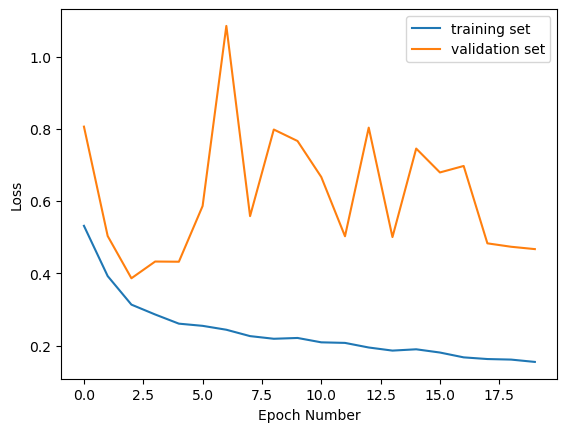

In [13]:
# plot training and validation loss values
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label='training set')
plt.plot(hist.history['val_loss'], label='validation set')
plt.legend()

For the accuracy values, we see the same issue where the training data does very well over time, but the validation data, not so much. The plot shows more proof that the model overfits the data. Again, the training set increases, but the validation set jumps a lot. So, the fact that the loss values and the accuracy are unstable, the model overfits the data. 

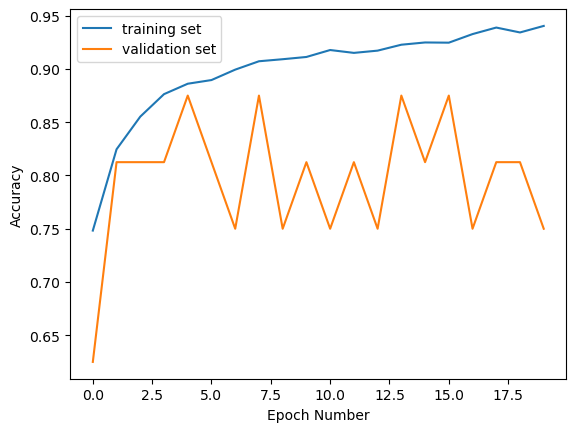

In [14]:
# plot training and validation accuracy values
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='training set')
plt.plot(hist.history['val_accuracy'], label='validation set')
plt.legend()

### Step 6: Model Evaluation

Finally, I evaluated the model. Evaluating the model involves testing ites performace on the test dataset, which has never seen before. The **evaluate** method calculates the loss and the accuracy of the model on the test data. Here, we see how the model runs on new data in the test set.

In [12]:
# evaluate the model on the test data
validation_loss, validation_accuracy = model.evaluate(test_generator)

# print the validation loss and accuracy
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

2024-11-19 17:40:18.616426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 5s 255ms/step - loss: 0.2435 - accuracy: 0.9343
Validation loss:  0.2435215413570404
Validation accuracy:  0.9342948794364929


From the looks of this, the loss on the test set approximately 24.35% with an accuracy of 93.43%. I'm glad the model works great with the test data, but there's a disconnect between the model and the data. While the accuracy on the test set is pretty high, there are fluctuations in the accuracy in the validation set, which shows that there's some kind of inconsistency in the model. To add, the validation loss is high for validation set, which could mean that it can predict the categories of the images correctly, but is not confident with the predictions. Finally, because there is a pretty large gap between and the training accuracy and the validation accuracy, it shows that the model overfits or is having issues with generalizing to new data. 

### Step 7: Reflection

Overall, this project was a big learning experience for me. I have spent countless of hours trying to figure out what to do to make the model not overfit the data, and still achieve the best accuracy. It hasn't been promising, but the most important thing is that I learned a lot about machine learning with this experience. I have split the data myself in another draft to get rid of the imbalance, I've tried different augumentations, even using no augumentation, and playing around with the CNN. I have not gotten it down yet, but one day I will. I'm glad that that the accuracy on the testing data was 93.43% was great, it shows that the model can detect if an X-Ray has pneumonia or not. However, this wouldn't be acceptable for real-world scenarios because the model is not confident at giving me good predictions. The biggest challenge that I faced here was that I didn't have much knowledge about what I was doing and I was learning on the way. I tried to be creative to make my pneumonia detector based on other sources, but it's been more difficult, especially in multiple drafts, where it only got worse. I truly think I'm missing an obvious detail - maybe it's the data - I don't know. 

So, did I fail? I would say no, because I took as much time as possible to learn as much as I can, which is the overall goal of these projects. For sure, I didn't achieve what I wanted to achieve, but with more experience, I'm sure that I can accomplish this task. The good thing about this project is that I didn't have to get everything perfect - I had to attempt to and learn from it. I know for a fact that's what I did and I'm okay with that. Next time, when I have more time to look into the project, I will do more research, and do the best to level up the project. 

# References

chandimap. (2019). Pneumonia-Detection-of-Chest-X-Ray-Images/Preprocessing.ipynb at master · chandimap/Pneumonia-Detection-of-Chest-X-Ray-Images. GitHub. https://github.com/chandimap/Pneumonia-Detection-of-Chest-X-Ray-Images/blob/master/Preprocessing.ipynb

Chollet, F. (2016). Building powerful image classification models using very little data. Keras.io. https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

Mathur, M. (n.d.). Pneumonia Detection using CNN(92.6% Accuracy). Kaggle.com. https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy

Pneumonia Detection Using CNN in Python. (2023, March 23). GeeksforGeeks. https://www.geeksforgeeks.org/pneumonia-detection-using-cnn-in-python/